In [1]:
import os
import glob
import random

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from illusion_grid_generator import IllusionGridGenerator

In [2]:
grid_params = {
  'size': 224,
  'square_size': None,
  'start_position': None,

  'line_width': 4,
  'line_luminance': .5,
  'curve_amplitude': 0,
  
  'circle_radius': 5,
  'circle_luminance': 1.,
  'offset_bars': False,
  
  'scaling': 4,
}

grid_type = {
  'a_scintillating': grid_params.copy(),
  'b_sin_curve': grid_params.copy(),
  'c_large_circle': grid_params.copy(),
  'd_offset_bars': grid_params.copy(),
  'e_no_bars': grid_params.copy(),
}

grid_type['b_sin_curve']['curve_amplitude'] = 4
grid_type['c_large_circle']['circle_radius'] = 10
grid_type['d_offset_bars']['offset_bars'] = True
grid_type['e_no_bars']['line_width'] = 0




In [3]:
data_dir = './data'
square_size_list = np.arange(40, 120, 5, dtype=np.int32)
start_position_list = np.arange(10, 90, 10, dtype=np.int32)

mu_list = np.arange(0, 1.05, 0.05)

for type_name in grid_type.keys():
  grid = IllusionGridGenerator(**grid_type[type_name])

  for square_size in square_size_list:
    grid.square_size = square_size
    for start_position in start_position_list:
      grid.start_position = start_position

      for mu in mu_list:
        grid.circle_luminance = mu

        grid.generate_grid()
        grid.save_image(data_dir, type_name)

In [130]:
def generate_hermann_grid(size, square_size, line_width, start_position, circle_radius, amplitude = 4):
  # 画像の初期化
  image = np.zeros((size, size), dtype=np.uint8)
  # 直線の描画 （縦方向）
  x = np.linspace(0, size, size+1, dtype=np.int32)
  print(x)
  for i in range(start_position, size, square_size):
    sin_x = i + amplitude * np.sin( (x-start_position) / (square_size / (2 * np.pi)))
    sin_x = np.round(sin_x).astype(int)
    for j in range(len(x) - 1):
      cv2.line(image, (x[j], sin_x[j]), (x[j + 1], sin_x[j + 1]), 255, line_width)

  # 直線の描画（横方向）
  y = np.linspace(0, size, size+1, dtype=np.int32)
  for i in range(start_position, size, square_size):
    sin_y = i + amplitude * np.sin( (y-start_position) / (square_size / (2 * np.pi)))
    sin_y = np.round(sin_y).astype(int)
    for j in range(len(y) - 1):
      cv2.line(image, (sin_y[j], y[j]), (sin_y[j + 1], y[j + 1]), 255, line_width)

  # 交点に円を描画
  for i in range(start_position, size, square_size):
    for j in range(start_position, size, square_size):
      cv2.circle(image, (j, i), circle_radius, 180, -1)

  return image

# パラメータ設定
size = 224
square_size = 50
line_width = 2
start_position = 10
circle_radius = 4

# ヘルマン格子画像の生成
image = generate_hermann_grid(size, square_size, line_width, start_position, circle_radius)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224]


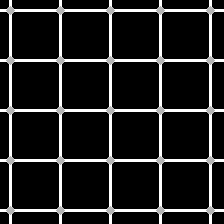

In [131]:
Image.fromarray(image)

In [107]:
image.shape

(232, 232)

In [12]:
size = 224
len(np.linspace(0, size, size))

224

In [15]:
square_size = grid_parms['square_size']

In [26]:
size = 224

In [40]:
sin_x = np.linspace(0, size-1, size, dtype=np.int32)

In [42]:
image = np.zeros((size, size), dtype=np.uint8)
sin_x = np.linspace(0, size-1, size, dtype=np.int32)
sin_y = square_size * np.sin(sin_x / (square_size / (2 * np.pi)))
sin_y[sin_y < 0] = 0
sin_y[sin_y >= size] = size-1
sin_y = np.round(sin_y).astype(int)

In [43]:
for j in range(len(sin_x) - 1):
  cv2.line(image, (sin_x[j], sin_y[j]), (sin_x[j + 1], sin_y[j + 1]), 255, line_width)

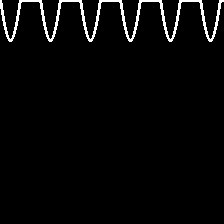

In [45]:
Image.fromarray(image)

In [34]:
np.min(sin_y)

-40

In [29]:
len(sin_y)

224

In [ ]:
# 画像の初期化


# 直線の描画（縦方向）
# for i in range(start_position, size, square_size):
i = 0
sin_x = np.linspace(0, size)
sin_y = i + square_size * np.sin(sin_x / (square_size / (2 * np.pi)))
sin_y = np.round(sin_y).astype(int)
for j in range(len(sin_x) - 1):
  cv2.line(image, (sin_x[j], sin_y[j]), (sin_x[j + 1], sin_y[j + 1]), 255, line_width)